In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import seaborn as sns
import os
import statistics

In [2]:
ff = pd.read_csv('stackfootfall.csv')
ff.timestamp = pd.to_datetime(ff.timestamp, format = '%Y-%m-%d %H:%M:%S') 

tube_frame = pd.read_csv('D:\CASA\modules_2\Dissertation\publication\data\ByhrEntryExit2018.csv')

In [62]:
google = pd.read_csv('google_popular_times.csv')
google.head()

,station,day,hour,count
0,Russell Square,1,0,28.0
1,Russell Square,1,1,15.0
2,Russell Square,1,2,6.5
3,Russell Square,1,3,0.0
4,Russell Square,1,4,0.0


In [3]:
plt.style.use('default')

In [94]:
def ComparisonPlot(loc, stat):
    
    fig,axs = plt.subplots(3,1, figsize=(8, 15))
    
    
    ff_case = ff.loc[(ff.location == loc) & (ff.timestamp >= '2018-09') & (ff.timestamp <= '2018-11-30')
                    ][['timestamp','footfall','year','month','day','hour','day_of_week']]
    ff_case.index = ff_case.timestamp


    # location flow 
    ff_case = ff_case.resample('H').mean()
    ff_case['footfall'].replace(0, np.nan, inplace = True)
    ff_case['footfall'] = ff_case['footfall'].interpolate(method='linear')
    ff_case = ff_case.reset_index(level = ['timestamp'])
    ff_case.timestamp = pd.to_datetime(ff_case.timestamp, format = '%Y-%m-%d %H:%M:%S')

    temp = ff_case[['timestamp', 'footfall']]
    temp.index = temp.timestamp
    temp['hour'] = temp.timestamp.dt.hour
    temp['day_of_week'] = temp.timestamp.dt.dayofweek + 1
    temp
    ff_case = temp

    ff_case.loc[(ff_case.day_of_week >= 1) & (ff_case.day_of_week <= 4)].groupby('hour')['footfall'].mean().plot(
        title = 'Location ' + str(loc) + ' 5min Aggregated Counts by Hourly Mean',
        label = 'MTT', linewidth = 2, ax = axs[0])
    weekday = 5
    ff_case.loc[(ff_case.day_of_week == weekday)].groupby('hour')['footfall'].mean().plot(
        label = 'FRI', linewidth = 2, ax = axs[0])
    weekday = 6
    ff_case.loc[(ff_case.day_of_week == weekday)].groupby('hour')['footfall'].mean().plot(
        label = 'SAT', linewidth = 2, ax = axs[0])
    weekday = 7
    ff_case.loc[(ff_case.day_of_week == weekday)].groupby('hour')['footfall'].mean().plot(
        label = 'SUN', linewidth = 2, ax = axs[0])
    plt.legend(loc = 'best')

   
    # nearest tube station flow(both)
    direct = 'BOTH'
    day = 'MTT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean().plot(
        title = stat + ' Station 15min Aggregated Entry & Exit Counts by Hourly Mean',
        label = day, linewidth = 2, ax = axs[1]) 
    day = 'FRI'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean().plot(label = day, linewidth = 2, ax = axs[1])
    day = 'SAT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean().plot(label = day, linewidth = 2, ax = axs[1]) 
    day = 'SUN'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean().plot(label = day, linewidth = 2, ax = axs[1])    
    plt.legend(loc = 'best')
    
    
    # popular times of tube station in google map
    google.loc[(google.station == stat) & (google.day >= 1) & (google.day <= 4)
              ].groupby('hour')['count'].mean().plot(
        title = stat + ' Station Google Popular Times',
        label = 'MTT', linewidth = 2, ax = axs[2]).set_yticklabels(['']*5)
    weekday = 5
    google.loc[(google.station == stat) & (google.day == weekday)].groupby('hour')[
        'count'].mean().plot(label = 'FRI', linewidth = 2, ax = axs[2])
    weekday = 6
    google.loc[(google.station == stat) & (google.day == weekday)].groupby('hour')[
        'count'].mean().plot(label = 'SAT', linewidth = 2, ax = axs[2])
    weekday = 7
    google.loc[(google.station == stat) & (google.day == weekday)].groupby('hour')[
        'count'].mean().plot(label = 'SUN', linewidth = 2, ax = axs[2])
    plt.legend(loc = 'best')    

## 1. Visualization of Flows at Some Famous Landmarks

### (1) Location710 at 275 Regent Street 
- 176 metres from Oxford Circus station

No handles with labels found to put in legend.
No handles with labels found to put in legend.


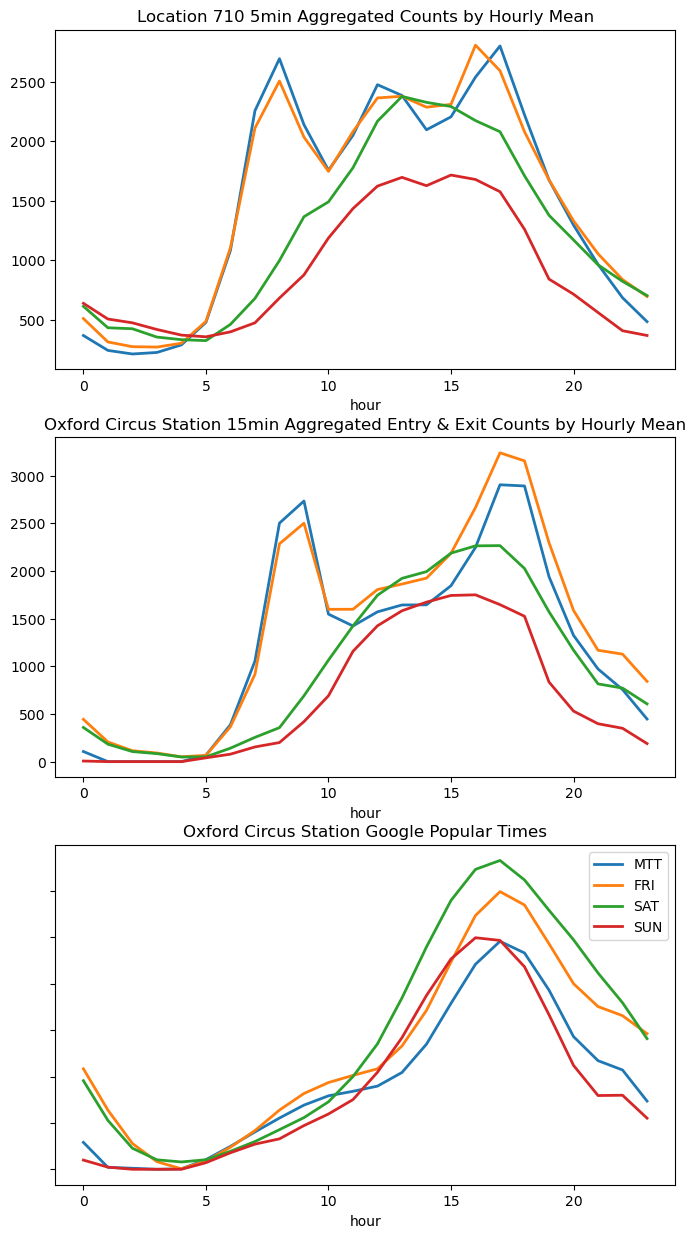

In [95]:
ComparisonPlot(710, 'Oxford Circus')

In [54]:
print(corr.loc[corr['loc'] == 710])

     loc           stat  day direct      corr
492  710  Oxford Circus  MTT     IN  0.542420
493  710  Oxford Circus  FRI     IN  0.510851
494  710  Oxford Circus  SAT     IN  0.698155
495  710  Oxford Circus  SUN     IN  0.729563
496  710  Oxford Circus  MTT    OUT  0.778340
497  710  Oxford Circus  FRI    OUT  0.837033
498  710  Oxford Circus  SAT    OUT  0.975173
499  710  Oxford Circus  SUN    OUT  0.942485
500  710  Oxford Circus  MTT   BOTH  0.900507
501  710  Oxford Circus  FRI   BOTH  0.873533
502  710  Oxford Circus  SAT   BOTH  0.952142
503  710  Oxford Circus  SUN   BOTH  0.959217


### (2) Location575 at Brunswick Centre
- 125 metres from Russell Sq station

No handles with labels found to put in legend.
No handles with labels found to put in legend.


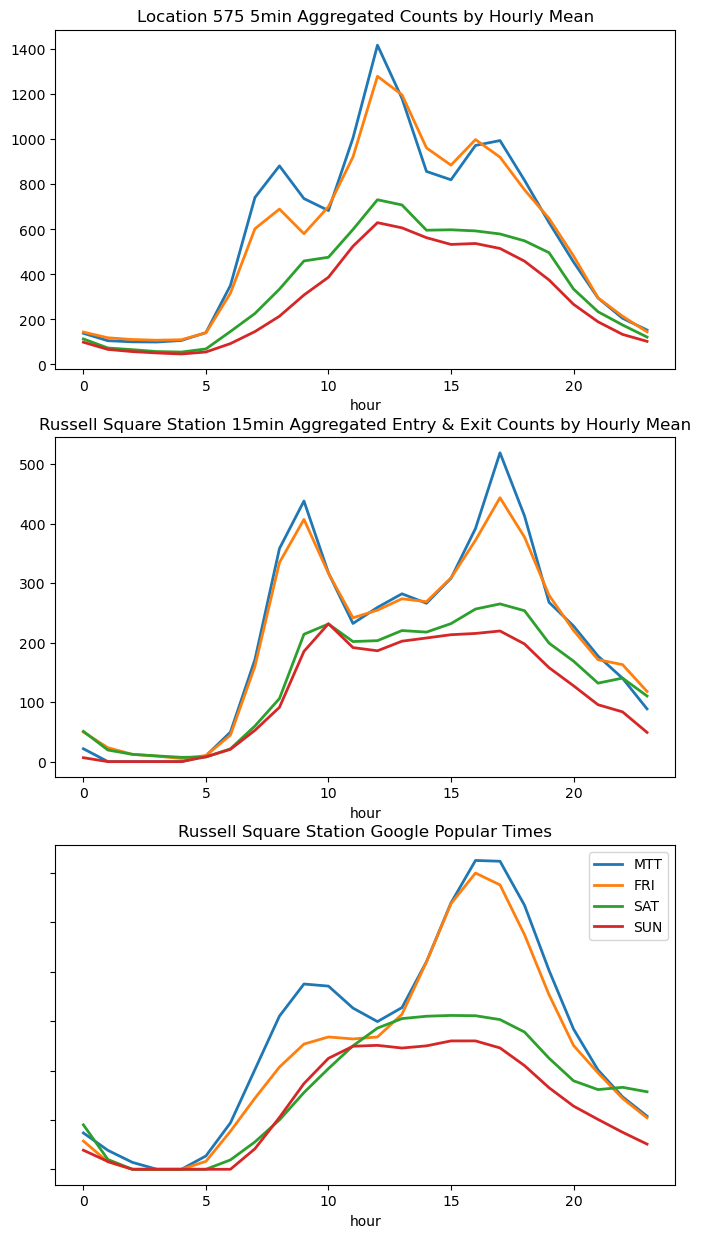

In [96]:
ComparisonPlot(575, 'Russell Square')

In [53]:
print(corr.loc[corr['loc'] == 575])

     loc            stat  day direct      corr
456  575  Russell Square  MTT     IN  0.642081
457  575  Russell Square  FRI     IN  0.720978
458  575  Russell Square  SAT     IN  0.897026
459  575  Russell Square  SUN     IN  0.870012
460  575  Russell Square  MTT    OUT  0.721372
461  575  Russell Square  FRI    OUT  0.666179
462  575  Russell Square  SAT    OUT  0.905860
463  575  Russell Square  SUN    OUT  0.957374
464  575  Russell Square  MTT   BOTH  0.795558
465  575  Russell Square  FRI   BOTH  0.790332
466  575  Russell Square  SAT   BOTH  0.914779
467  575  Russell Square  SUN   BOTH  0.936812


### (3) Location709 at Kensignton Arcade 
- 85 metres from High Street Kensington station

No handles with labels found to put in legend.
No handles with labels found to put in legend.


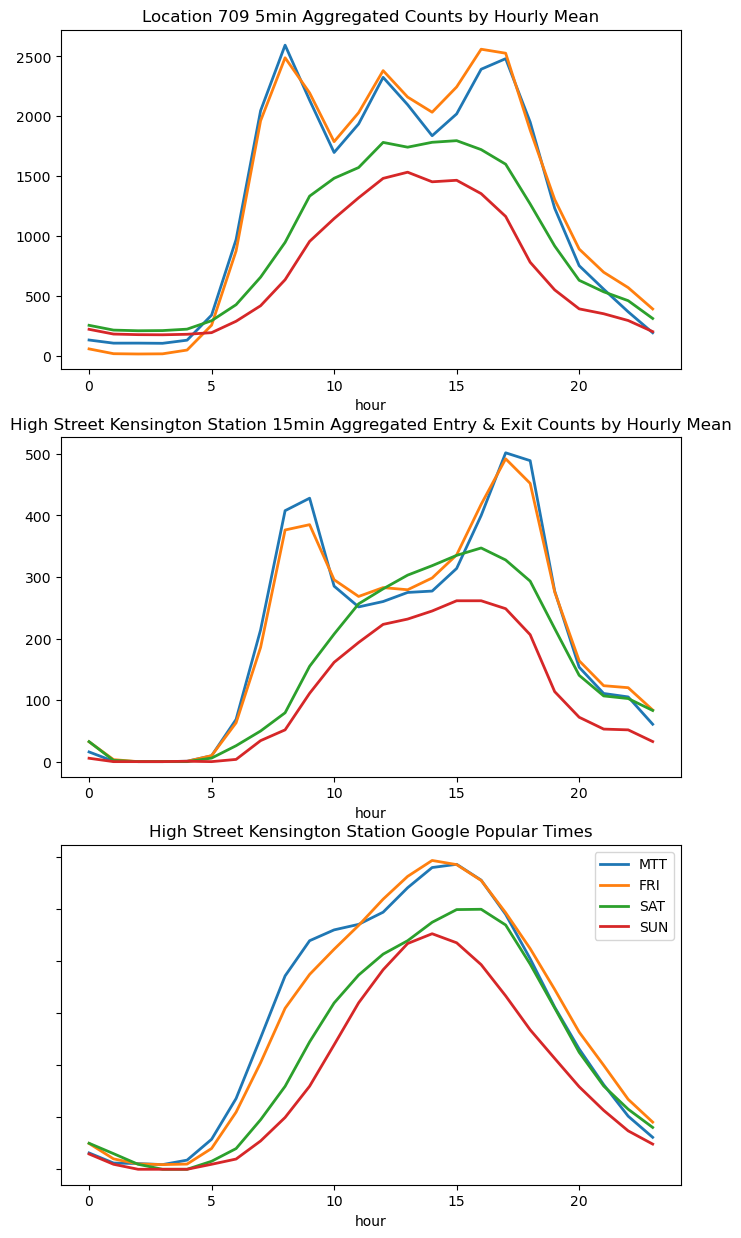

In [97]:
ComparisonPlot(709, 'High Street Kensington')

In [51]:
print(corr.loc[corr['loc'] == 709])

     loc                    stat  day direct      corr
480  709  High Street Kensington  MTT     IN  0.751167
481  709  High Street Kensington  FRI     IN  0.784169
482  709  High Street Kensington  SAT     IN  0.859511
483  709  High Street Kensington  SUN     IN  0.876305
484  709  High Street Kensington  MTT    OUT  0.853946
485  709  High Street Kensington  FRI    OUT  0.891540
486  709  High Street Kensington  SAT    OUT  0.980701
487  709  High Street Kensington  SUN    OUT  0.987470
488  709  High Street Kensington  MTT   BOTH  0.914529
489  709  High Street Kensington  FRI   BOTH  0.929711
490  709  High Street Kensington  SAT   BOTH  0.942316
491  709  High Street Kensington  SUN   BOTH  0.950121


### (4) Location119 at Marble Arch Park
- 125 metres from Marble Arch station

No handles with labels found to put in legend.
No handles with labels found to put in legend.


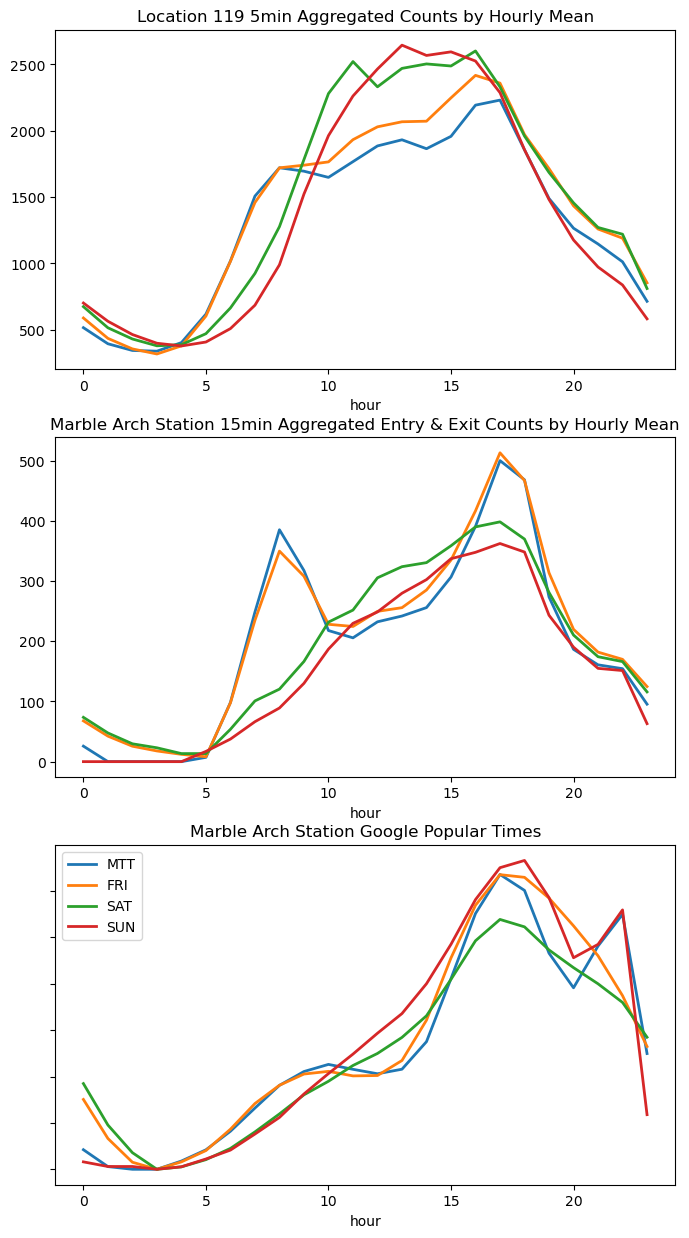

In [98]:
ComparisonPlot(119, 'Marble Arch')

In [52]:
print(corr.loc[corr['loc'] == 119])

     loc         stat  day direct      corr
216  119  Marble Arch  MTT     IN  0.788701
217  119  Marble Arch  FRI     IN  0.783220
218  119  Marble Arch  SAT     IN  0.812740
219  119  Marble Arch  SUN     IN  0.764831
220  119  Marble Arch  MTT    OUT  0.805361
221  119  Marble Arch  FRI    OUT  0.806390
222  119  Marble Arch  SAT    OUT  0.981653
223  119  Marble Arch  SUN    OUT  0.984854
224  119  Marble Arch  MTT   BOTH  0.917606
225  119  Marble Arch  FRI   BOTH  0.915914
226  119  Marble Arch  SAT   BOTH  0.938040
227  119  Marble Arch  SUN   BOTH  0.916780


### (5) Location982 at 13 Regent Street 
- 111 metres from Piccadilly Circus station

No handles with labels found to put in legend.
No handles with labels found to put in legend.


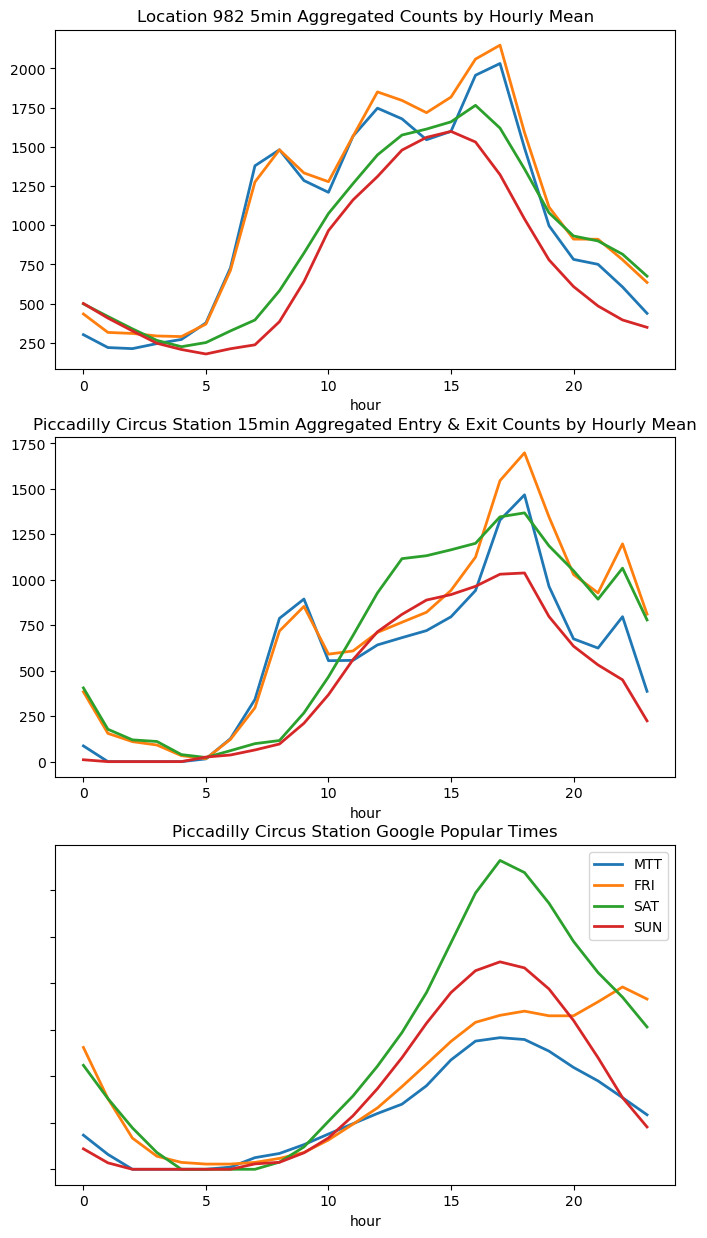

In [100]:
ComparisonPlot(982, 'Piccadilly Circus')

In [49]:
print(corr.loc[corr['loc'] == 982])

     loc               stat  day direct      corr
924  982  Piccadilly Circus  MTT     IN  0.441015
925  982  Piccadilly Circus  FRI     IN  0.334974
926  982  Piccadilly Circus  SAT     IN  0.580636
927  982  Piccadilly Circus  SUN     IN  0.634644
928  982  Piccadilly Circus  MTT    OUT  0.803644
929  982  Piccadilly Circus  FRI    OUT  0.804212
930  982  Piccadilly Circus  SAT    OUT  0.953924
931  982  Piccadilly Circus  SUN    OUT  0.957419
932  982  Piccadilly Circus  MTT   BOTH  0.769567
933  982  Piccadilly Circus  FRI   BOTH  0.663507
934  982  Piccadilly Circus  SAT   BOTH  0.873748
935  982  Piccadilly Circus  SUN   BOTH  0.869906


### (6) Location713 at Tottenham Court Walk 
- 268 metres from Tottenham Court Road station

No handles with labels found to put in legend.
No handles with labels found to put in legend.


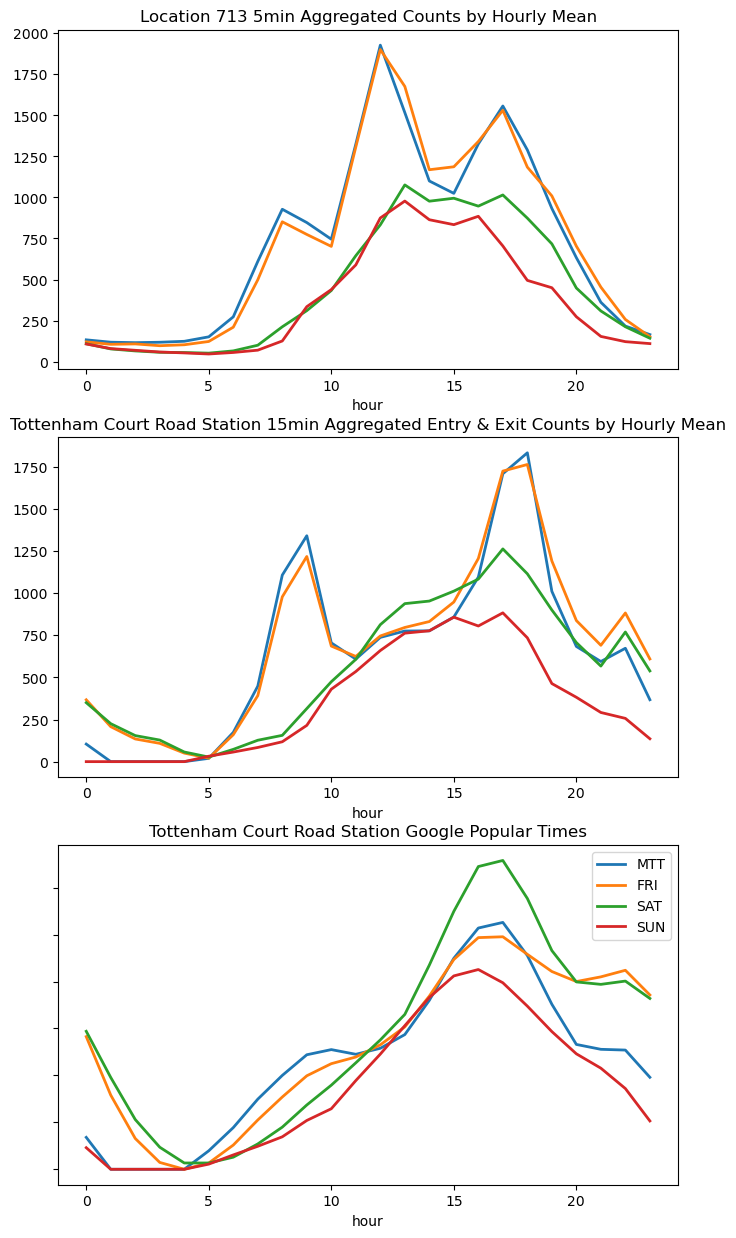

In [101]:
ComparisonPlot(713, 'Tottenham Court Road')

In [65]:
print(corr.loc[corr['loc'] == 713])

     loc                  stat  day direct      corr
516  713  Tottenham Court Road  MTT     IN  0.540278
517  713  Tottenham Court Road  FRI     IN  0.456547
518  713  Tottenham Court Road  SAT     IN  0.646806
519  713  Tottenham Court Road  SUN     IN  0.736378
520  713  Tottenham Court Road  MTT    OUT  0.613954
521  713  Tottenham Court Road  FRI    OUT  0.644703
522  713  Tottenham Court Road  SAT    OUT  0.971383
523  713  Tottenham Court Road  SUN    OUT  0.949044
524  713  Tottenham Court Road  MTT   BOTH  0.741394
525  713  Tottenham Court Road  FRI   BOTH  0.691322
526  713  Tottenham Court Road  SAT   BOTH  0.912214
527  713  Tottenham Court Road  SUN   BOTH  0.941247


## 2. Visualization of Pearson Correlation Results

In [46]:
corr = pd.read_csv('corr0218.csv', index_col = 0)
corr.head()

,loc,stat,day,direct,corr
0,5,Hammersmith (H&C),MTT,IN,0.944313
1,5,Hammersmith (H&C),FRI,IN,0.943947
2,5,Hammersmith (H&C),SAT,IN,0.977943
3,5,Hammersmith (H&C),SUN,IN,0.977617
4,5,Hammersmith (H&C),MTT,OUT,0.915778


In [166]:
corr['corr'].describe()

count    1056.000000
mean        0.778701
std         0.178739
min         0.119029
25%         0.680161
50%         0.832801
75%         0.917685
max         0.995715
Name: corr, dtype: float64

<AxesSubplot:xlabel='direct', ylabel='corr'>

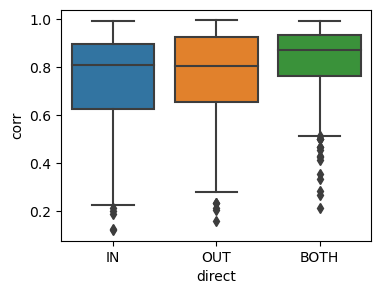

In [161]:
fig, ax = plt.subplots(figsize = (4,3))
sns.boxplot(y='corr', x='direct', data=corr)

<AxesSubplot:xlabel='day', ylabel='corr'>

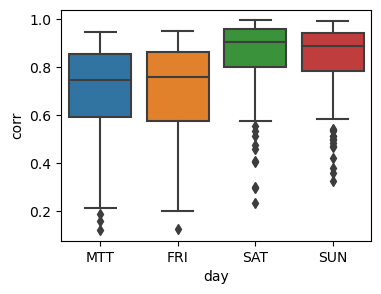

In [160]:
fig, ax = plt.subplots(figsize = (4,3))
sns.boxplot(y='corr', x='day', data=corr)

Text(0.5, 0, '')

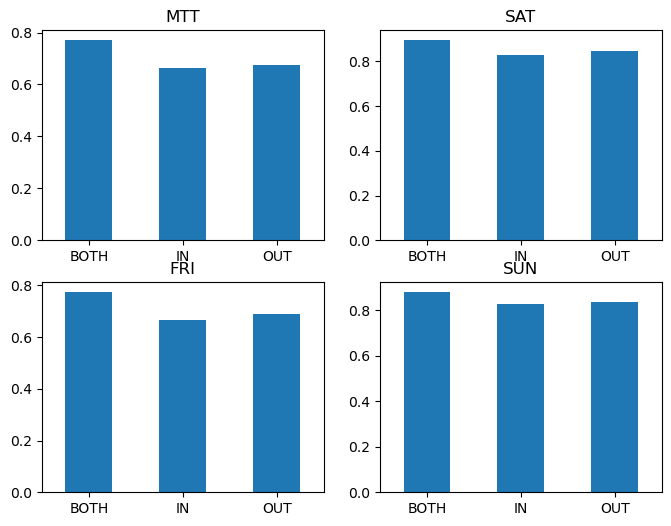

In [167]:
fig,axs = plt.subplots(2,2, figsize=(8, 6))

corr.loc[corr.day == 'MTT'].groupby('direct').mean()['corr'].plot(kind='bar',title = 'MTT',ax =axs[(0,0)])
axs[(0,0)].set_xticklabels(axs[(0,0)].get_xticklabels(),rotation=0)
axs[(0,0)].set_xlabel('')
corr.loc[corr.day == 'FRI'].groupby('direct').mean()['corr'].plot(kind='bar',title = 'FRI',ax =axs[(1,0)])
axs[(1,0)].set_xticklabels(axs[(1,0)].get_xticklabels(),rotation=0)
axs[(1,0)].set_xlabel('')
corr.loc[corr.day == 'SAT'].groupby('direct').mean()['corr'].plot(kind='bar',title = 'SAT',ax =axs[(0,1)])
axs[(0,1)].set_xticklabels(axs[(0,1)].get_xticklabels(),rotation=0)
axs[(0,1)].set_xlabel('')
corr.loc[corr.day == 'SUN'].groupby('direct').mean()['corr'].plot(kind='bar',title = 'SUN',ax =axs[(1,1)])
axs[(1,1)].set_xticklabels(axs[(1,1)].get_xticklabels(),rotation=0)
axs[(1,1)].set_xlabel('')


## Main Findings:
- The distribution of footfall counts on different weekdays (Monday to Thursday, Friday, Saturday, and Sunday) is highly similar to the passenger counts of nearby tube stations. 
- According to the results of the calculation of the Pearson correlation coefficient, overall, footfall in retail areas has the strongest correlation with the sum of inbound and outbound passengers at nearby tube stations.And the correlation between the two is more significant on weekends.
- However, as for some well-known large retail areas, the distribution of footfall on weekends might be more related to the number of tube exits.
- The distribution of pedestrain flow of the London Underground in autumn 2018 is somewhat similar to the popular times of the Google map. However, due to the differences in the data acquisition time (Google weekly popular times uses annual average and is updated to 2022), it can be seen that the pedestrain flow of some stations has undergone significant changes, which is mainly reflected in the decrease in the ratio of passengers on weekdays and the decrease in morning rush hour.